# Cloudy or Sunny

Planning astronomical observation we want to predict the  next day sky condition based on today weather.

In [1]:
import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from scipy.stats import uniform
import astroML.stats

From past history, we know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

To accomplish our goal we construct a **Markov chain**:

Here is an illustration of this process from an article in [towarddatascience.com](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d).

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)


Let's start with a clear day, clear = 0, cloudy = 1

In [2]:
N = 10000 #number of days 
result = []
trace_clear = []

def Next_day (x):
    for i in range(N): 
        if (x == 0):
            result.append(np.random.choice(np.array([0, 1]), p=np.array([0.9, 0.1])))
        else:
            result.append(np.random.choice(np.array([0, 1]), p=np.array([0.5, 0.5])))
        # we are doing this for a more general case where we don't have just 0 and 1 associated do cloudy and clear, here the opposite
        if (result[i] == 0):
            trace_clear.append(1)
        else: 
            trace_clear.append(0)
        x = result[-1]
    return  


Next_day(0)

result = np.array(result) 
trace_clear = np.array(trace_clear)

In [3]:
clear = result [result == 0] 
cloudy = result [result == 1] 
print(len(clear))
print(len(cloudy))
print("Probability of a sunny day:" + str(len(clear)/N))
print("Probability of a cloudy day:" + str(len(cloudy)/N))

8328
1672
Probability of a sunny day:0.8328
Probability of a cloudy day:0.1672


### Let's do the  *Trace-plot*

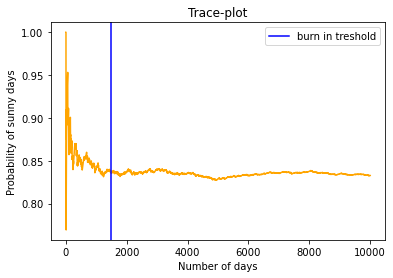

In [4]:
p_clear =np.cumsum(trace_clear)/( np.arange(trace_clear.shape[0])+1 )
plt.plot(p_clear, color = 'orange');
plt.title("Trace-plot")
plt.xlabel("Number of days")
plt.ylabel("Probability of sunny days")
plt.axvline(x = 1500, color = 'b', label = 'burn in treshold')
plt.legend()

Text(0.5, 1.0, 'Distribution with all the data')

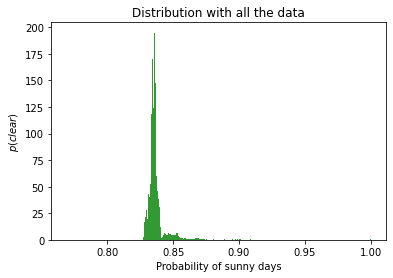

In [5]:
plt.hist(p_clear, bins=300, density=True, alpha=0.8, color = 'green');
plt.ylabel("$p(clear$)")
plt.xlabel("Probability of sunny days")
plt.title("Distribution with all the data")

We require that our process is stationary but that's not true in the first step, so let's define a **burn-in** phase, whose data are going to be discarded.

$$ Data_{Burn-in} = first\ 1500 \ data $$

Text(0.5, 1.0, 'Distribution with all the data')

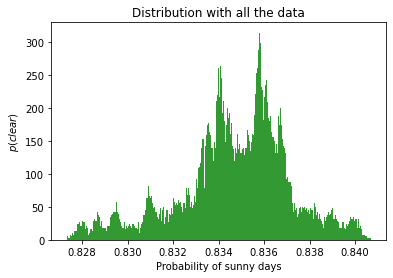

In [6]:
plt.hist(p_clear[1500:], bins=300, density=True, alpha=0.8, color = 'green');
plt.ylabel("$p(clear$)")
plt.xlabel("Probability of sunny days")
plt.title("Distribution with all the data")

In [7]:
print(np.median(p_clear[1500:]))
print(astroML.stats.sigmaG(p_clear[1500:]))
print(min(p_clear[1500:]),max(p_clear[1500:]))

0.8349167270213689
0.0020337082413925283
0.8273149082106113 0.8406934903500164


# Farlo con economia